# Fourier Transform
Fourier Transform is one of the techniques used to process images. This notebook aims to find out the usage of our Unet model.

### Idea_1: Edge Detection
Using Fourier Transform to remove low frequencies and detect edges in images can be a useful preprocessing step for image segmentation with Unet. By eliminating low frequencies, we can reduce the amount of noise and irrelevant information in the image, which can help the Unet model focus on the critical features necessary for segmentation. Edge detection can also be a helpful step in image segmentation, providing a clear boundary between different regions in the image.

### Idea_2: Extract of features from frequency domain
Another possible way to use Fourier Transform in image segmentation with Unet is to extract features from the frequency domain. Instead of removing low frequencies, we can use Fourier Transform to extract high-frequency information, capturing details such as edges, corners, and textures. These features can then be used as inputs to the Unet model and the original image.

### 0. Setup

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/MachineLearning/Geospatial_ML

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML


In [3]:
! git pull
! git checkout feature/fourier-transform

Already up to date.
Already on 'feature/fourier-transform'
Your branch is up to date with 'origin/feature/fourier-transform'.


In [31]:
import numpy as np
from matplotlib import pyplot as plt
import os
from image_processing.fourier_transform import FourierTransform

### 1. Loading Data

In [5]:
data_directory = "../data_colab/256_200"

x_train = np.load(os.path.join(data_directory, '2022_06_20.npz'))['x_input']

In [6]:
part_x_train = x_train[:5]

### 2. Transform Images into Magnitude Spectrum
The Magnitude Spectrum refers to the size of amplitude of each frequency components.

For visualisation purposes, it is often useful to have the low-frequency components at the centre of the image. So, this notebook shifts the low-frequencies to the centre.

In [7]:
FOURIERS = FourierTransform(part_x_train)
rgb_images = FOURIERS.get_rgb_images()

In [8]:
magnitude_spectrums = FOURIERS.generate_magnitude_spectrum()

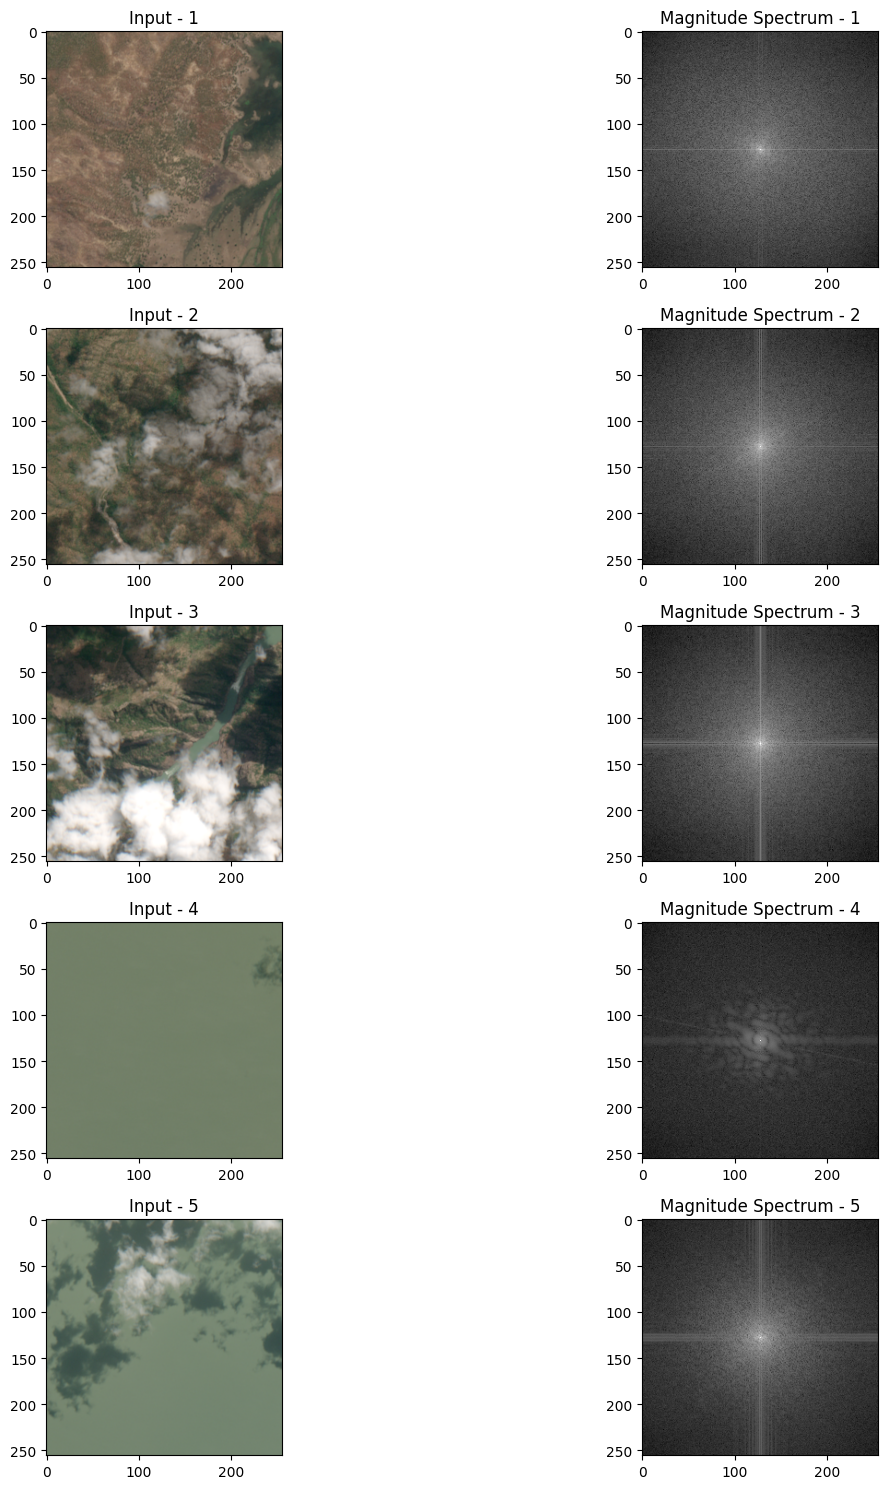

In [28]:
total_images = len(rgb_images)
fig, axs = plt.subplots(total_images, 2, figsize=(15, 15))

for i in range(total_images):
    axs[i, 0].imshow(rgb_images[i])
    axs[i, 0].set_title(f"Input - {i + 1}")

    axs[i, 1].imshow(magnitude_spectrums[i], cmap='gray')
    axs[i, 1].set_title(f"Magnitude Spectrum - {i + 1}")

    # Adjust spacing between subplots
fig.tight_layout()

plt.show()

### 3. Edge Detection

The Fourier Transform assumes that low-frequency components represents the average intensity or brightness of the image. So, for instance, if you remove low-frequency components from images (high-pass filtered images: HPF), you can detect edges of the images and might compress the images.

In [29]:
hpf_images = FOURIERS.generate_hpf_images()

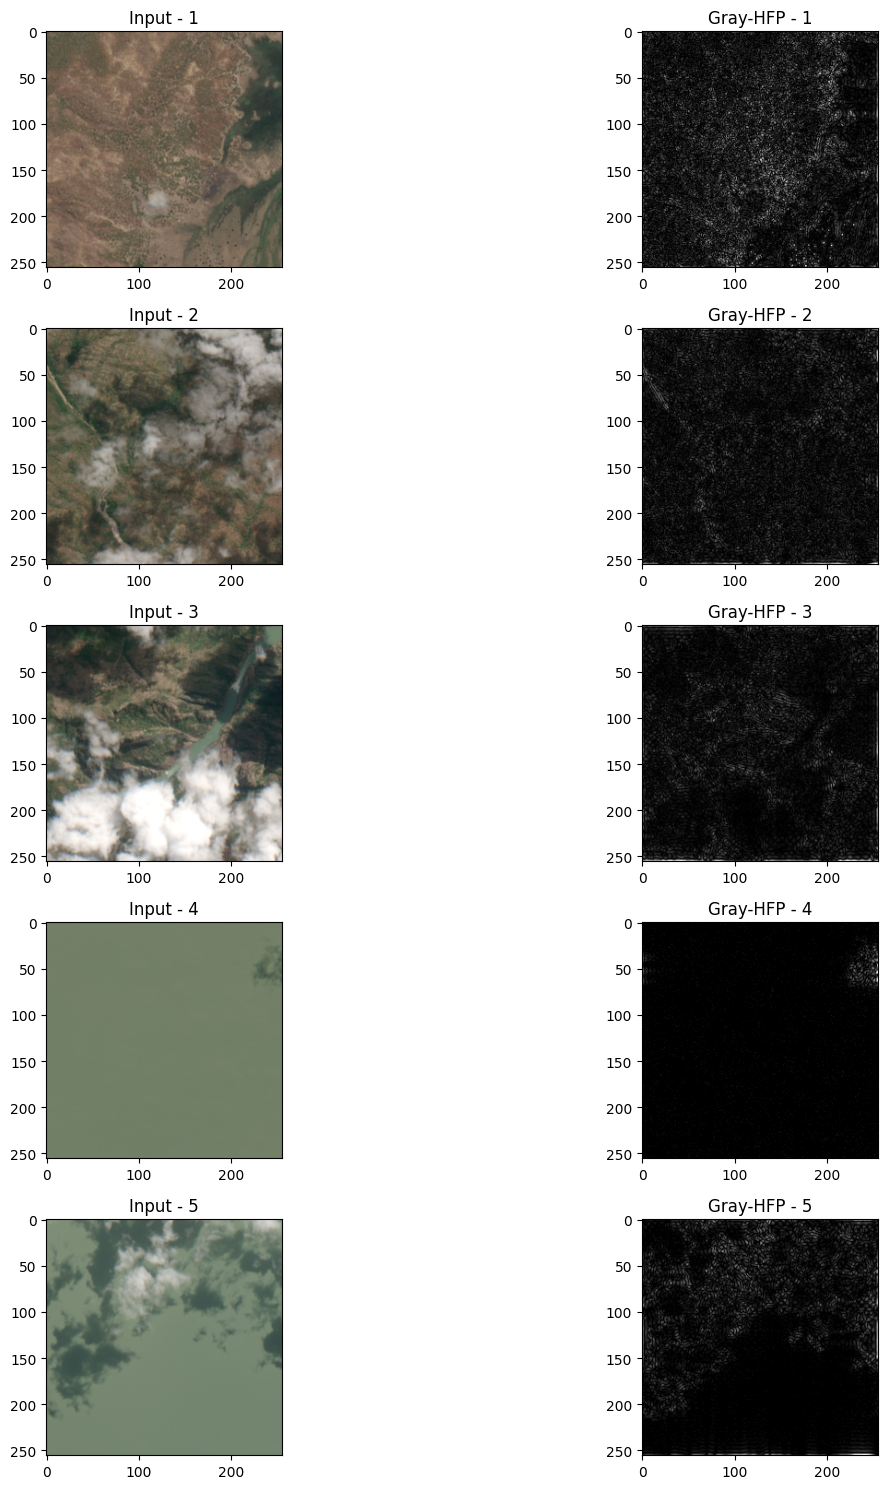

In [30]:
total_images = len(rgb_images)
fig, axs = plt.subplots(total_images, 2, figsize=(15, 15))

for i in range(total_images):
    axs[i, 0].imshow(rgb_images[i])
    axs[i, 0].set_title(f"Input - {i + 1}")

    axs[i, 1].imshow(hpf_images[i], cmap='gray')
    axs[i, 1].set_title(f"Gray-HFP - {i + 1}")

    # Adjust spacing between subplots
fig.tight_layout()

plt.show()